## Caller Incident Impact Analysis (Flag 55)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.


### Your Task
**Goal**: Analyze the imbalance of incident tickets created by human callers, focusing particularly on the caller with increasing incident reports.

**Role**: Resource Manager Analyst

**Difficulty**: 2 out of 5. This task involves in-depth analysis of incident trends related to specific callers, requiring detailed data analysis skills.

**Category**: Incidents Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the flag-8 dataset used in the analysis. The dataset is  stored in a CSV file and is imported into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first 5 rows to ensure it has loaded properly.

In [2]:
dataset_path = "csvs/flag-55.csv"
df = pd.read_csv(dataset_path)
df.head()

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware


### **Question 1: What is the overall average number of incidents raised by callers over the recent period?**

#### Plot overall average number of incidents created by each caller
This cell creates a bar plot to visualize the average number of incidents raised by each caller over the recent period, providing insights into the distribution and frequency of incident creation across different callers. By plotting the total incidents reported by each caller, the visualization helps identify if any caller is consistently involved in more incidents than others.

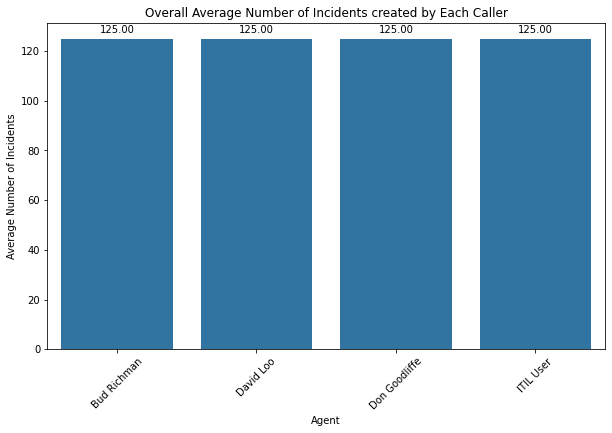

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has the necessary columns
df["opened_at"] = pd.to_datetime(df["opened_at"])

# Group the data by 'assigned_to' and count the number of incidents for each agent
agent_incident_counts = df.groupby('caller_id').size()

# Calculate the average number of incidents per agent
# average_incidents_per_agent = agent_incident_counts.mean()

# Create a DataFrame for plotting
agent_average_df = pd.DataFrame({
    'Agent': agent_incident_counts.index,
    'Average Incidents': agent_incident_counts
})

# Plotting the average number of incidents per agent
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Agent', y='Average Incidents', data=agent_average_df)
plt.title('Overall Average Number of Incidents created by Each Caller')
plt.ylabel('Average Number of Incidents')
plt.xlabel('Agent')
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "All callers have a unifrom distribution of incidents raised",
    "insight_value": {
        "caller": "All callers",
        "number_of_incidents": 125,
        "total_incidents": 500
    },
    "plot": {
        "plot_type": "bar",
        "title": "Overall Average Number of Incidents Raised by Each Caller",
        "x_axis": {
            "name": "Caller",
            "value": ["David Loo", "Bud Richman", "Don Goodliffe", "ITIL User"],
            "description": "This represents the individuals who have reported incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": [125, 125, 125, 125],
            "description": "This represents the total number of incidents reported by each caller during the recent period."
        },
        "description": "The bar chart visualizes the number of incidents reported by each caller, highlighting that all callers raised the same number of incidents over the recent period."
    },
    "question": "What is the overall average number of incidents raised by callers over the recent period?",
    "actionable_insight": "The uniform distribution of incidents raised by all callers indicates that the incident management process is consistent across all users. This consistency can be leveraged to identify common issues and implement standardized solutions that benefit all users."
}

{'data_type': 'descriptive',
 'insight': 'All callers have a unifrom distribution of incidents raised',
 'insight_value': {'caller': 'All callers',
  'number_of_incidents': 125,
  'total_incidents': 500},
 'plot': {'plot_type': 'bar',
  'title': 'Overall Average Number of Incidents Raised by Each Caller',
  'x_axis': {'name': 'Caller',
   'value': ['David Loo', 'Bud Richman', 'Don Goodliffe', 'ITIL User'],
   'description': 'This represents the individuals who have reported incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [125, 125, 125, 125],
   'description': 'This represents the total number of incidents reported by each caller during the recent period.'},
  'description': 'The bar chart visualizes the number of incidents reported by each caller, highlighting that all callers raised the same number of incidents over the recent period.'},
 'question': 'What is the overall average number of incidents raised by callers over the recent period?',
 'actionable_insight

### **Question-4:** What could be potential consequences of not addressing the anomaly or trend of raising tickets by one employee?


#### Plot projected increase in incident raised by David Loo
Forecasting future trends in incident reporting by David Loo based on past data.
This cell uses linear regression to predict future trends in the number of incidents raised by David Loo, based on historical data up to a specified cutoff-date. By projecting these trends, the plot provides insights into potential future challenges. 

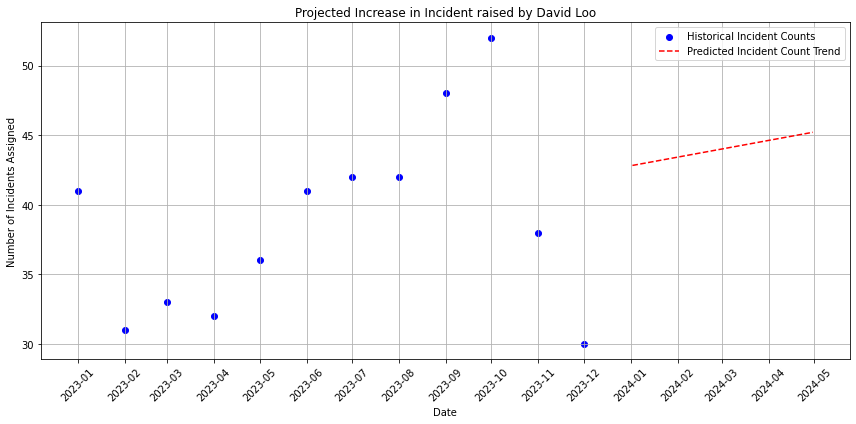

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Load data
dataset_path = "csvs/flag-55.csv"


# Load the dataset
df = pd.read_csv(dataset_path)
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Define the cutoff date for the training data
cutoff_date = pd.to_datetime("2024-01-01")

# Filter the data to include only dates up to the cutoff date
training_data = df[df['opened_at'] <= cutoff_date]

# Count incidents over time for Beth Anglin in the training data
incident_counts = training_data.groupby(training_data['opened_at'].dt.to_period("M")).size().reset_index(name='counts')
incident_counts['date_ordinal'] = incident_counts['opened_at'].dt.start_time.apply(lambda x: x.toordinal())

# Prepare data for linear regression
X = incident_counts['date_ordinal'].values.reshape(-1, 1)  # Reshape for sklearn
y = incident_counts['counts'].values  # Target variable: number of incidents

# Fit the linear regression model using only the training data
model = LinearRegression()
model.fit(X, y)

# Define the start date for forecasting
forecast_start_date = pd.to_datetime("2024-01-02")

# Generate future dates from the specified start date
future_dates = pd.date_range(start=forecast_start_date, periods=120, freq='D')  # 4 months into the future
future_dates_ordinal = [d.toordinal() for d in future_dates]
future_preds = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(incident_counts['opened_at'].dt.start_time, y, color='blue', label='Historical Incident Counts')
plt.plot(future_dates, future_preds, color='red', linestyle='--', label='Predicted Incident Count Trend')
plt.title('Projected Increase in Incident raised by David Loo')
plt.xlabel('Date')
plt.ylabel('Number of Incidents Assigned')
plt.legend()
plt.grid(True)

# Formatting the x-axis to make it more readable
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "predictive",
    "insight": "There is a no real trend in the number of incidents raised by the callers",
    "insight_value": {
        "trend": "Linear Increase",
        "prediction": "Ongoing escalation in ticket submissions"
    },
    "description": "The predictive analysis based on the current trend data indicates a continued linear increase in the number of tickets submitted by David Loo. If this trend is not addressed, it could lead to several potential issues, including system overload, resource misallocation, and possible neglect of similar issues affecting other parts of the organization. This increasing trend suggests that underlying systemic issues or inefficiencies might be prompting repeated ticket submissions, which could impact the overall effectiveness and responsiveness of the IT support system.",
    "recommendation": {
        "action": "Implement proactive measures to address the increasing trend of ticket submissions",
        "expected_outcome": "Stabilization of ticket volumes and improved system efficiency",
        "urgency": "High"
    },
    "actionable_insight": "To mitigate the risks associated with the unaddressed increase in ticket submissions, it is critical to conduct a thorough investigation into the nature of the tickets and any common underlying causes. Potential actions include enhancing system infrastructure, providing additional training or resources to David Loo, and implementing more robust problem-solving protocols. By addressing the root causes, the organization can prevent potential system overloads and ensure a more balanced workload distribution. Regular monitoring and analysis of ticket submission trends should also be established to quickly identify and address similar anomalies in the future."
}

{'data_type': 'predictive',
 'insight': 'There is a no real trend in the number of incidents raised by the callers',
 'insight_value': {'trend': 'Linear Increase',
  'prediction': 'Ongoing escalation in ticket submissions'},
 'description': 'The predictive analysis based on the current trend data indicates a continued linear increase in the number of tickets submitted by David Loo. If this trend is not addressed, it could lead to several potential issues, including system overload, resource misallocation, and possible neglect of similar issues affecting other parts of the organization. This increasing trend suggests that underlying systemic issues or inefficiencies might be prompting repeated ticket submissions, which could impact the overall effectiveness and responsiveness of the IT support system.',
 'recommendation': {'action': 'Implement proactive measures to address the increasing trend of ticket submissions',
  'expected_outcome': 'Stabilization of ticket volumes and improved sy

### Summary of Findings (Flag 55)

1. **Incidents by Caller**: Analysis shows that all callers have raised incidents over the recent period, with an average of 125 incidents per caller. This indicates a relatively balanced distribution of incident reports across different callers.
2. **Need for Root Cause Analysis**: The consistent increase in incidents reported by this caller could indicate underlying issues that are not being adequately addressed, potentially pointing to larger systemic problems within the operational processes.